In [62]:
%run '0.0_init_configuration.ipynb'

In [63]:
df = pd.read_csv('../../data/processed/0.2_Cardiovascular_Disease_Dataset.csv')

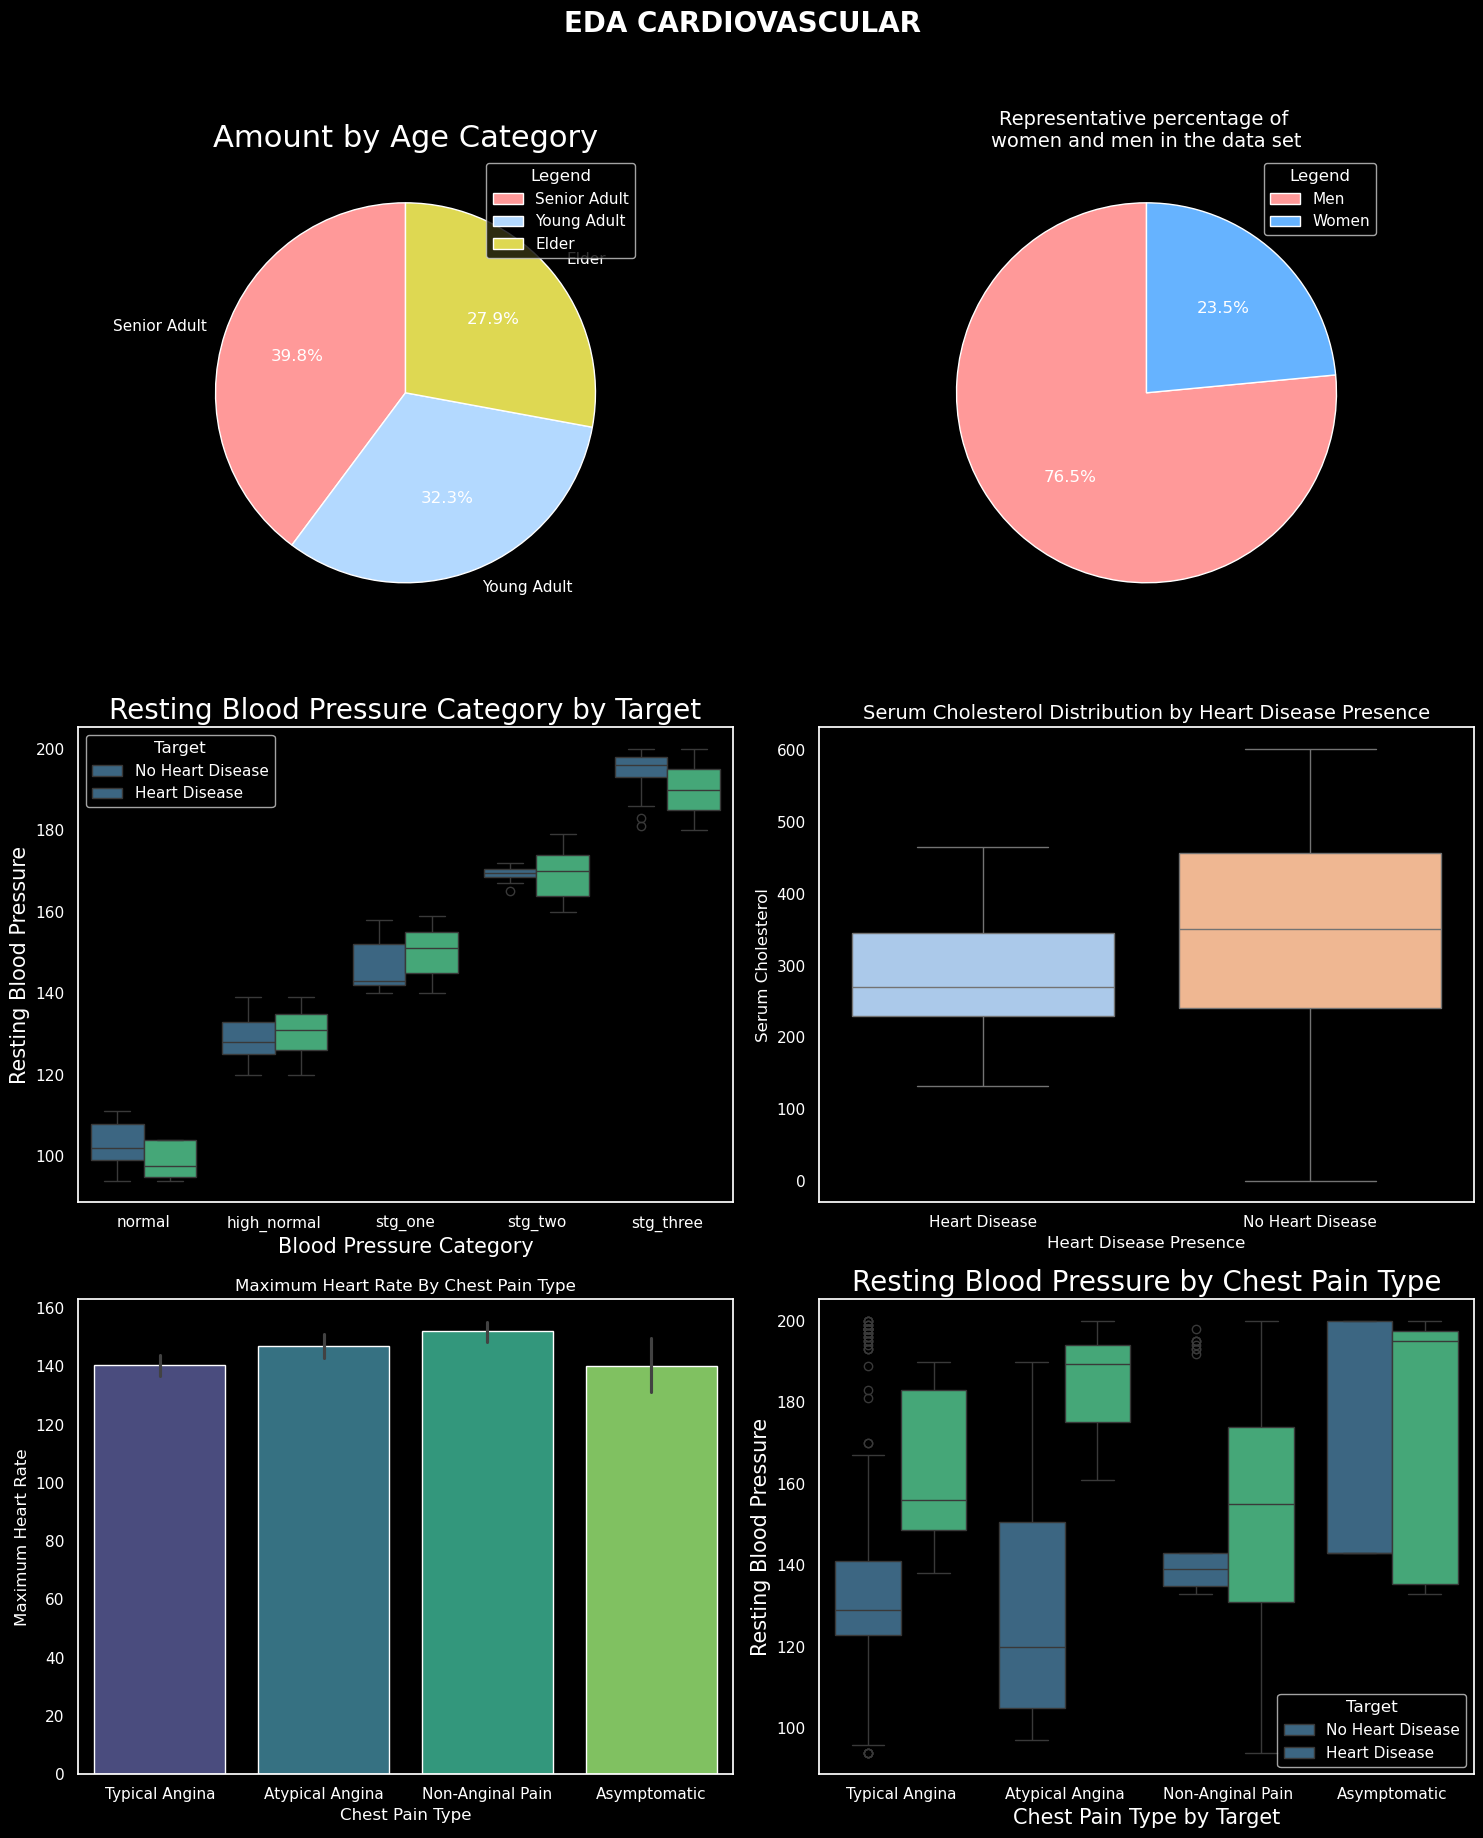

In [65]:
fig, axes = plt.subplots(3,2, figsize=(15,18))
axes = axes.flatten()

# Gráfico 1: 
age_category = (df['age'].apply(lambda x : 'Young Adult' if 18 <= x <=35
                                else 'Senior Adult' if 35 < x <= 55
                                else 'Elder'))

amount = age_category.value_counts().tolist()
labels = age_category.unique().tolist()

colors= ["#ff9999", "#b3d9ff", "#DED852"]

axes[0].pie(amount, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
axes[0].legend(loc='upper right', title='Legend')
axes[0].set_title('Amount by Age Category', fontsize=22)



# Gráfico 2
gender_count = df['gender'].value_counts()
gender_porcentage = df['gender'].value_counts(normalize = True) * 100

axes[1].pie(gender_porcentage, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=90)
axes[1].set_title('Representative percentage of \nwomen and men in the data set', fontsize=14)
axes[1].legend(title='Legend',loc='upper right',labels=['Men', 'Women'])


# Gráfico 3

bp_category= df['restingBP'].apply(lambda x: 'normal' if 90 <= x < 120
                                    else 'high_normal' if 120 <= x < 140
                                    else 'stg_one' if 140 <= x < 160
                                    else 'stg_two' if 160 <= x < 180
                                    else 'stg_three')

category_order = ['normal', 'high_normal', 'stg_one', 'stg_two', 'stg_three']

sns.boxplot(ax=axes[2],  # Asignar el gráfico al subplot correspondiente
            x=bp_category,
            y=df['restingBP'],
            order=category_order,
            palette='viridis',
            hue=df['target'])
axes[2].set_title('Resting Blood Pressure Category by Target', fontsize=20)
axes[2].set_xlabel('Blood Pressure Category', fontsize=15)
axes[2].set_ylabel('Resting Blood Pressure', fontsize=15)
axes[2].legend(title='Target', labels=['No Heart Disease', 'Heart Disease'], loc='best')



# Gráfico 4 

sns.boxplot(x='target', y='serumcholestrol', data=df, palette='pastel', ax=axes[3])
axes[3].set_title('Serum Cholesterol Distribution by Heart Disease Presence', fontsize=14)
axes[3].set_xlabel('Heart Disease Presence')
axes[3].set_ylabel('Serum Cholesterol')
axes[3].set_xticks(ticks=[0, 1], labels=['Heart Disease', 'No Heart Disease']) #blue yes, orange no

# Gráfico 5
sns.barplot(x='chestpain', y='maxheartrate', data=df, palette='viridis', ax=axes[4])
axes[4].set_title('Maximum Heart Rate By Chest Pain Type')
axes[4].set_xlabel('Chest Pain Type')
axes[4].set_xticks(ticks=[0, 1, 2, 3], labels=['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic'])
axes[4].set_ylabel('Maximum Heart Rate')

# Grafico 6
sns.boxplot(data=df,x='chestpain',y='restingBP',palette='viridis',
            hue='target',ax=axes[5])

axes[5].set_title('Resting Blood Pressure by Chest Pain Type', fontsize=20)
axes[5].set_xlabel('Chest Pain Type by Target', fontsize=15)
axes[5].set_xticks(ticks=[0, 1, 2, 3], labels=['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic'])
axes[5].set_ylabel('Resting Blood Pressure', fontsize=15)
axes[5].legend(title='Target', labels=['No Heart Disease', 'Heart Disease'], loc='lower right')


fig.suptitle("EDA CARDIOVASCULAR", fontsize=20, fontweight="bold", y=1.02)
plt.tight_layout()
plt.show()